# Diffusion

This notebook illustrates the classification of the nodes of a graph by [diffusion](https://en.wikipedia.org/wiki/Heat_equation), based on the labels of a few nodes.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import DiffusionClassifier
from sknetwork.visualization import svg_graph, svg_bigraph

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

In [5]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [6]:
diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_predict(adjacency, seeds)

In [7]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.94

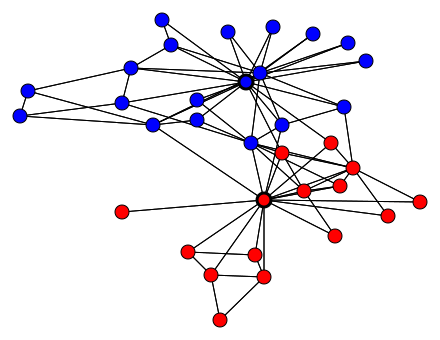

In [8]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=seeds)
SVG(image)

In [10]:
# soft classification (here probability of label 1)
scores = diffusion.score(label=1)

In [11]:
image = svg_graph(adjacency, position, scores=scores, seeds=seeds)
SVG(image)

## Directed graphs

In [13]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [14]:
rembrandt = 5
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1}

In [15]:
diffusion = DiffusionClassifier()
labels = diffusion.fit_predict(adjacency, seeds)

In [16]:
image = svg_graph(adjacency, position, names, labels=labels, seeds=seeds)
SVG(image)

In [18]:
# soft classification (here probability of label 0)
scores = diffusion.score(label=0)

In [19]:
image = svg_graph(adjacency, position, names=names, scores=scores, seeds=[cezanne])
SVG(image)

## Bipartite graphs

In [21]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [22]:
inception = 0
drive = 3

In [23]:
seeds_row = {inception: 0, drive: 1}

In [24]:
diffusion = DiffusionClassifier()
diffusion.fit(biadjacency, seeds_row)
labels_row = diffusion.labels_row_
labels_col = diffusion.labels_col_

In [25]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col, seeds_row=seeds_row)
SVG(image)

In [27]:
# soft classification
membership_row = diffusion.membership_row_
membership_col = diffusion.membership_col_

In [28]:
# probability of label 1
scores_row = membership_row[:,1].toarray().ravel()
scores_col = membership_col[:,1].toarray().ravel()

In [29]:
image = svg_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col,
                    seeds_row=seeds_row)
SVG(image)
